<a href="https://colab.research.google.com/github/pdrzxzz/machine-learning/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
# Link to google drive, because the data is stored there.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine-Learning-A-Z-Codes-Datasets/Part 2 - Regression/Section 4 - Simple Linear Regression/Python/Salary_Data.csv')
# Separate features and target variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
X[:10] # Years of experience

array([[1.1],
       [1.3],
       [1.5],
       [2. ],
       [2.2],
       [2.9],
       [3. ],
       [3.2],
       [3.2],
       [3.7]])

In [6]:
y[:10] # Salary

array([39343., 46205., 37731., 43525., 39891., 56642., 60150., 54445.,
       64445., 57189.])

Looks good!

## Plotting data

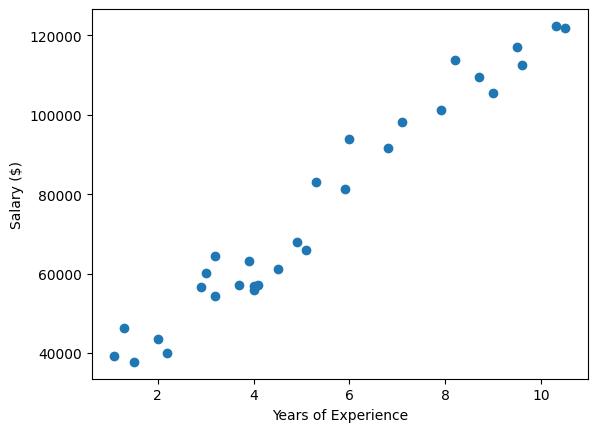

In [20]:
# Let's see the correlation of the variables
plt.scatter(X, y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.show()

We can see that these variables are really attached to each one in a linear ratio.  
Based on this, we may be able to predict the value of one given the other.  
Let's try the **Linear Regression Model**!

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [11]:
regressor.predict(X_test)

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [12]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

The predicted values looks close to the wanted results,  
let's evaluate our model using a regression metric.

Read more on:  
https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, regressor.predict(X_test))

0.9749154407708353

The maximum value of r2_score metric is 1, looks like our model did well.

## Visualising the Training set results

In [23]:
regressor.predict(X_train)

array([ 53919.42532909,  74480.49870396,  56723.20806202,  68872.93323808,
       103452.92027763,  90368.60085726,  38965.91742009, 124948.58789682,
        54854.0195734 ,  47377.2656189 ,  81957.25265845,  82891.84690277,
        61396.17928358,  56723.20806202, 110929.67423213,  45508.07713028,
        37096.72893147,  93172.3835902 ,  72611.31021533,  64199.96201652])

In [24]:
y_train

array([ 56642.,  66029.,  64445.,  61111., 113812.,  91738.,  46205.,
       121872.,  60150.,  39891.,  81363.,  93940.,  57189.,  54445.,
       105582.,  43525.,  39343.,  98273.,  67938.,  56957.])

Observe that with this model we don't get the exact mapping from X_train to y_train.  
`(regressor.predict(X_train[n]) != y_train[n])`  

The model kind ignores the noise of the input and try to choose a equation that is close to the wanted results.

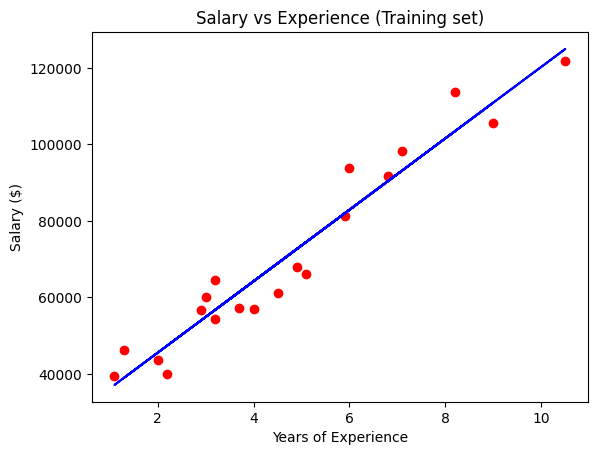

In [26]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.show()

## Visualising the Test set results

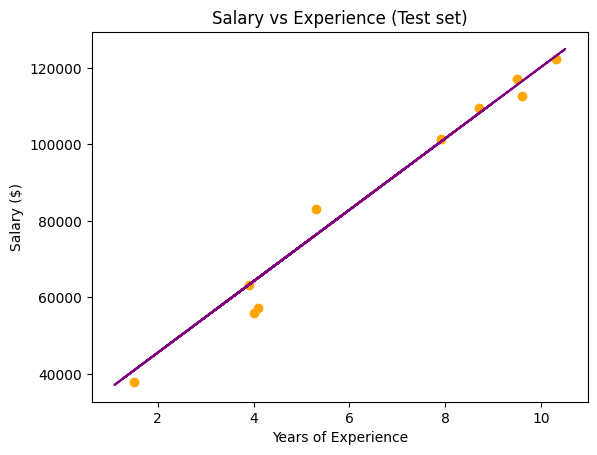

In [31]:
plt.scatter(X_test, y_test, color='orange')
# In this line below we not have to replace X_train by X_test because the equation (and the line) will be the same for both.
plt.plot(X_train, regressor.predict(X_train), color='purple')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.show()

## Making a single prediction

In [36]:
regressor.predict([[12]])

array([138967.5015615])

The double brackets are because the predict method on our model accepts an 2D array.

An employee with 12 years of experience should have a salary of about 139.000$ in this company.

## Getting the linear regression equation


Our model have some attributes that can give us information about how it works behind the scenes...

In [37]:
regressor.coef_

array([9345.94244312])

In [38]:
regressor.intercept_

np.float64(26816.192244031183)

The equation of out linear regression model is:


`Salary = 9345 x YearsExperience + 26816`